In [19]:
import pandas as pd
import yfinance as yf

# Define the symbols for Nvidia, Intel, and AMD
symbols = ['AMD', 'INTC', 'NVDA']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 10 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbols
portfolio_df.columns = symbols

# Add a column for the number of shares (1000 shares for each stock)
portfolio_df['Shares_AMD'] = 1000
portfolio_df['Shares_INTC'] = 1000
portfolio_df['Shares_NVDA'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                       portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                       portfolio_df['NVDA'] * portfolio_df['Shares_NVDA'])

# Round the portfolio value columns to 2 decimal places
portfolio_df = portfolio_df.round({'AMD': 2, 'INTC': 2, 'NVDA': 2, 'Portfolio_Value': 2})

# Print the first few rows of the portfolio DataFrame
display(portfolio_df.head())
display(portfolio_df.tail())



[*********************100%%**********************]  3 of 3 completed


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value
Date,,,,,,,
2014-03-28,3.88,19.43,4.24,1000,1000,1000,27555.42
2014-03-31,4.01,19.58,4.24,1000,1000,1000,27831.93
2014-04-01,4.07,19.72,4.42,1000,1000,1000,28203.78
2014-04-02,4.06,19.64,4.39,1000,1000,1000,28089.49
2014-04-03,4.00,20.03,4.44,1000,1000,1000,28471.33


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value
Date,,,,,,,
2024-03-21,178.68,42.42,914.35,1000,1000,1000,1135449.97
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03
2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98
2024-03-27,179.59,43.77,902.50,1000,1000,1000,1125860.00


[*********************100%%**********************]  3 of 3 completed


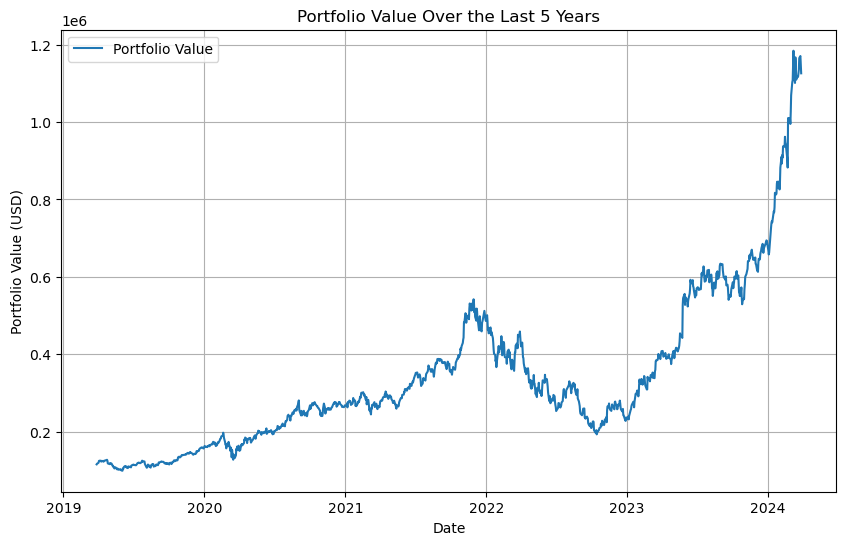

In [21]:
import matplotlib.pyplot as plt

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 5 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbols
portfolio_df.columns = symbols

# Add a column for the number of shares (1000 shares for each stock)
portfolio_df['Shares_AMD'] = 1000
portfolio_df['Shares_INTC'] = 1000
portfolio_df['Shares_NVDA'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                   portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                   portfolio_df['NVDA'] * portfolio_df['Shares_NVDA'])

# Round the portfolio value columns to 2 decimal places
portfolio_df = portfolio_df.round({'AMD': 2, 'INTC': 2, 'NVDA': 2, 'Portfolio_Value': 2})

# Plot the portfolio value for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Portfolio_Value'], label='Portfolio Value')
plt.title('Portfolio Value Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid(True)
plt.show()

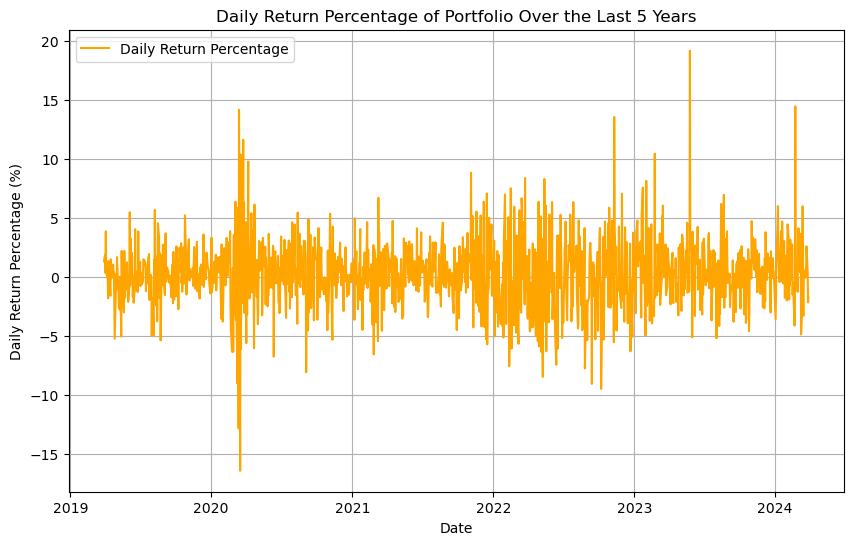

In [22]:
# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Plot the daily return percentage for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Daily_Return_Percentage'], label='Daily Return Percentage', color='orange')
plt.title('Daily Return Percentage of Portfolio Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Calculate daily percentage change in portfolio value and add it as a new column
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Print the first few rows of the portfolio DataFrame
portfolio_df

,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Daily_Return_Percentage
Date,,,,,,,,
2019-03-28,25.06,46.48,44.01,1000,1000,1000,115548.67,NaN
2019-03-29,25.52,46.99,44.59,1000,1000,1000,117098.56,1.341331
2019-04-01,26.36,47.70,45.26,1000,1000,1000,119322.79,1.899451
2019-04-02,26.75,47.57,45.44,1000,1000,1000,119760.30,0.366661
2019-04-03,29.02,48.55,46.83,1000,1000,1000,124405.88,3.879065
...,...,...,...,...,...,...,...,...
2024-03-21,178.68,42.42,914.35,1000,1000,1000,1135449.97,0.870608
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,2.612184
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,0.460902


In [28]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the symbols for Nvidia, Intel, and AMD
symbols = ['AMD', 'INTC', 'NVDA']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 5 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbols
portfolio_df.columns = symbols

# Add a column for the number of shares (1000 shares for each stock)
portfolio_df['Shares_AMD'] = 1000
portfolio_df['Shares_INTC'] = 1000
portfolio_df['Shares_NVDA'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                   portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                   portfolio_df['NVDA'] * portfolio_df['Shares_NVDA'])

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Feature Extraction
# Lagged values of daily return percentage
portfolio_df['Previous_Return'] = portfolio_df['Daily_Return_Percentage'].shift(1)

# Rolling statistics of daily return percentage
portfolio_df['Rolling_Mean'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).mean()
portfolio_df['Rolling_Std'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
portfolio_df.dropna(inplace=True)

# Prepare data for machine learning
X = portfolio_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y = portfolio_df['Daily_Return_Percentage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Predict future daily return percentages for the next 30 days
last_features = X.tail(1)
next_30_days = pd.date_range(start=portfolio_df.index[-1], periods=30, freq='D')
future_features = pd.DataFrame(index=next_30_days, columns=X.columns)
future_features.iloc[0] = last_features.values[0]

for i in range(1, 30):
    future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))

future_predictions = model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)


[*********************100%%**********************]  3 of 3 completed

Mean Absolute Error: 1.9438686009598922
Future Predictions for the next 30 days:
[0.58188785 1.10050985 1.37435482 0.96007179 1.36206819 0.98748217
 0.48254673 1.23002835 1.46447938 0.36807778 1.40135902 1.09821904
 1.16126442 1.12877801 0.70482126 1.56418119 1.51047736 0.59360233
 0.9072175  0.87257863 1.44781619 0.51209453 0.34518445 0.64948587
 0.69585525 0.4230792  0.76275237 1.22991524 1.46213957 0.56796612]


In [33]:
portfolio_df

,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Daily_Return_Percentage,Previous_Return,Rolling_Mean,Rolling_Std
Date,,,,,,,,,,,
2019-04-08,28.530001,48.726154,47.621864,1000,1000,1000,1.248780e+05,-0.137075,0.222715,1.123725,1.408557
2019-04-09,27.240000,48.411110,46.993660,1000,1000,1000,1.226448e+05,-1.788345,-0.137075,0.676629,1.776595
2019-04-10,27.830000,48.787403,47.698830,1000,1000,1000,1.243162e+05,1.362849,-1.788345,0.599972,1.725891
2019-04-11,27.790001,48.831173,47.559780,1000,1000,1000,1.241810e+05,-0.108818,1.362849,0.532046,1.745845
2019-04-12,27.850000,49.373734,47.179886,1000,1000,1000,1.244036e+05,0.179308,-0.108818,0.003509,0.935791
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,178.679993,42.419998,914.349976,1000,1000,1000,1.135450e+06,0.870608,0.733813,-0.381919,1.549108
2024-03-22,179.649994,42.570000,942.890015,1000,1000,1000,1.165110e+06,2.612184,0.870608,0.238866,1.771966
2024-03-25,178.630005,41.830002,950.020020,1000,1000,1000,1.170480e+06,0.460902,2.612184,0.773676,0.864529


In [31]:
portfolio_df.columns

Index(['AMD', 'INTC', 'NVDA', 'Shares_AMD', 'Shares_INTC', 'Shares_NVDA',
       'Portfolio_Value', 'Daily_Return_Percentage', 'Previous_Return',
       'Rolling_Mean', 'Rolling_Std'],
      dtype='object')